In [1]:
import matplotlib.pyplot as plt
import numpy as np
from neuromodes.io import fetch_surf
from neuromodes.eigen import EigenSolver, get_eigengroup_inds

In [2]:
surf, medmask = fetch_surf(density='4k')
solver = EigenSolver(surf, mask=medmask).solve(7**2)

In [3]:
# Check orthonormality within eigengroups
groups = get_eigengroup_inds(solver.n_modes)

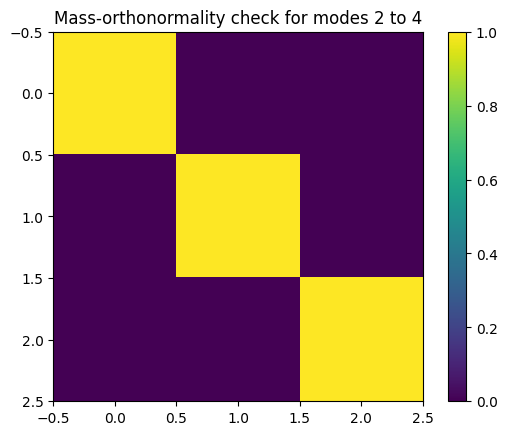

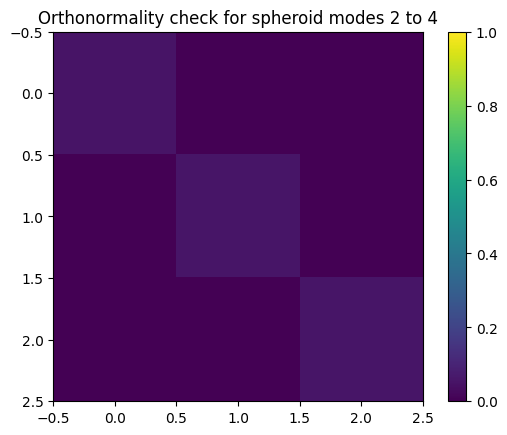

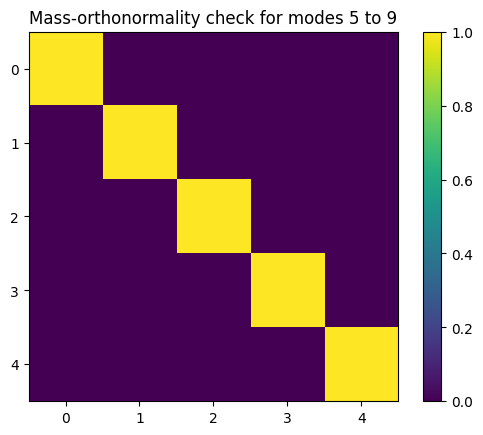

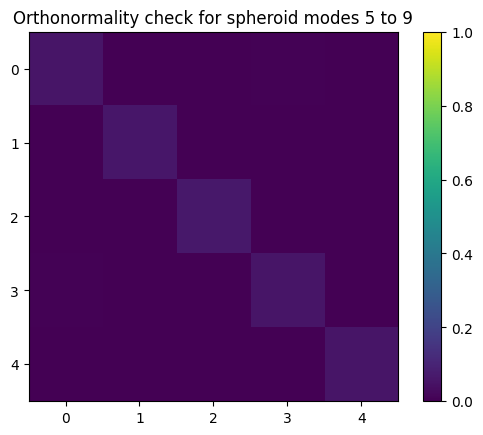

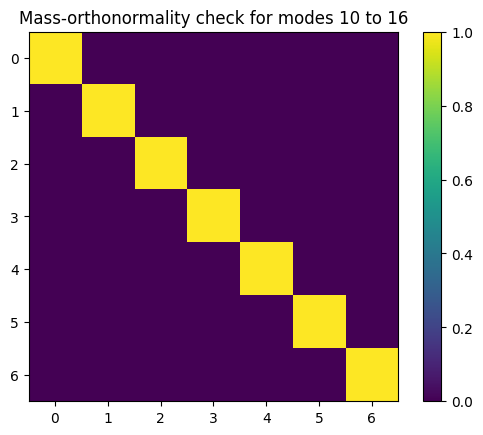

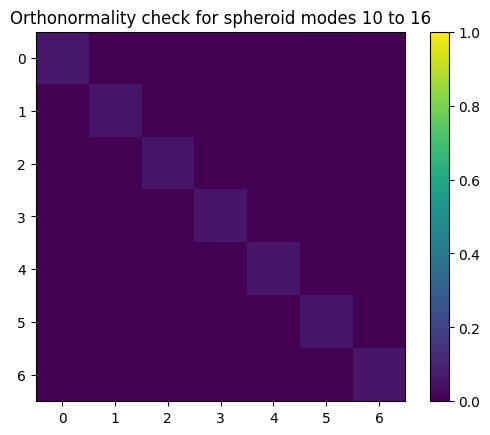

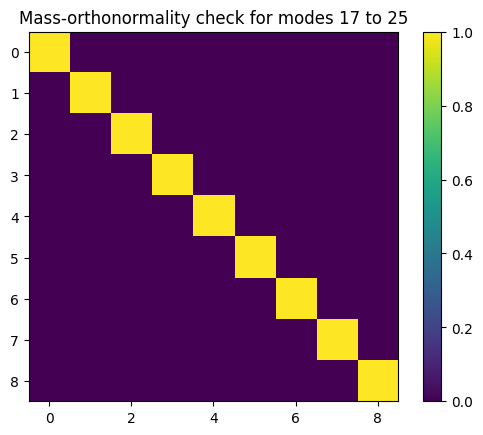

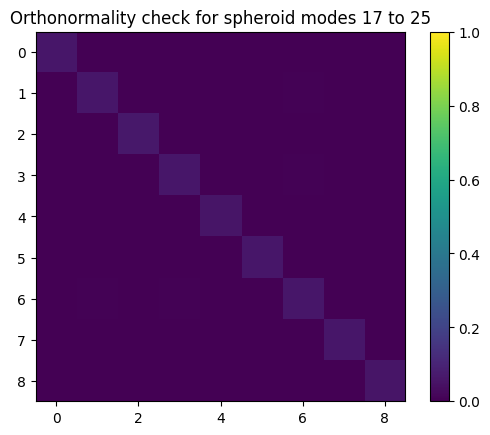

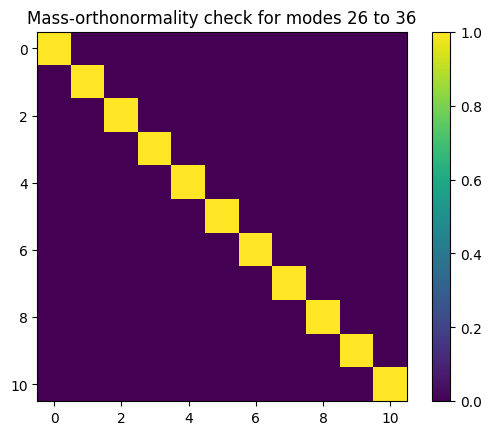

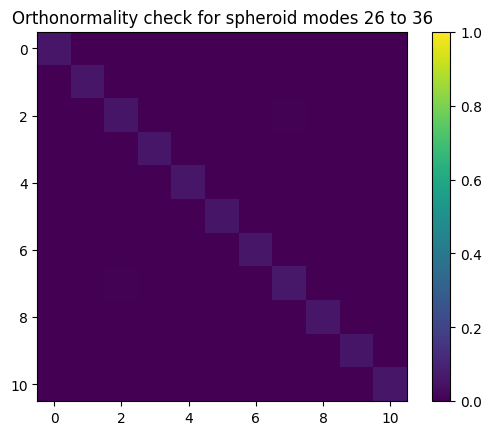

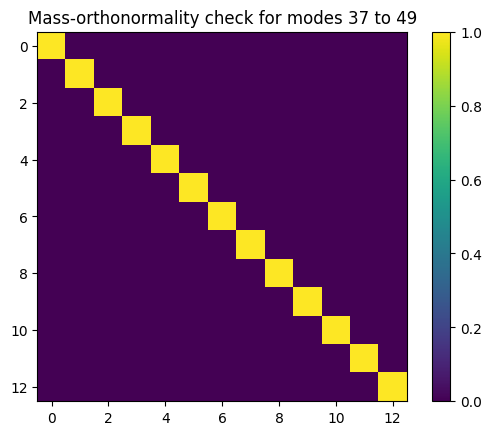

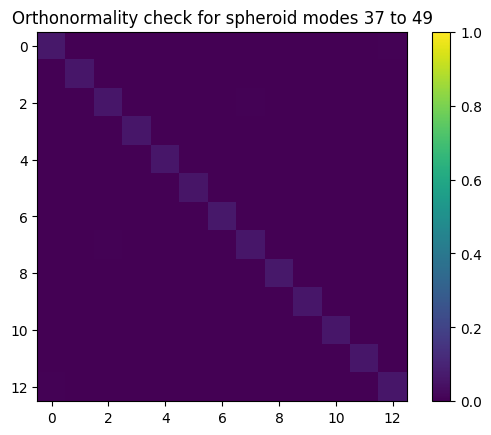

In [ ]:
for group_idx in groups[1:]:
    # Get eigenmodes and eigenvalues for this group
    group_emodes = solver.emodes[:, group_idx]
    group_evals = solver.evals[group_idx]

    mass_ortho_check = group_emodes.T @ solver.mass @ group_emodes
    
    plt.imshow(mass_ortho_check, vmin=0, vmax=1)
    plt.title(f'Mass-orthonormality check for modes {group_idx[0]+1} to {group_idx[-1]+1}')
    plt.colorbar()
    plt.show()

    # Transform modes to spheroid, rotate, then transform back to ellipsoid
    group_emodes /= np.sqrt(group_evals)

    # Check orthonormality of transformed modes
    ortho_check = group_emodes.T @ group_emodes
    plt.imshow(ortho_check, vmin=0, vmax=1)
    plt.title(f'Orthonormality check for spheroid modes {group_idx[0]+1} to {group_idx[-1]+1}')
    plt.colorbar()
    plt.show()